 # Contenido

* [Introducción](#intro)
    * [Inicialización](#inicio)
        * [Cargar los datos](#charge)
        * [Preprocesamiento de datos](#datasets)
* [Preparación datos para entrenamiento](#preparation)
    * [One-Hot](#ohe)
    * [Escala estándar](#scalar)
* [Modelo Árbol de decisión](#tree)
    * [Validación de Modelo](#validation)
        * [Exactitud](#exact)
        * [Prueba de Cordura](#cord)
        * [Matriz de Confusión](#confusion)
        * [Recall](#recall)
        * [Precisión](#precision)
        * [Valor F1](#f1)
     * [Mejorar de modelo](#mejor)
        * [Mejor Hiperpárametro max_depth](#max_depth)
        * [Balance de clases](#balance)
        * [Sobremuestreo](#upsample)
        * [Submuestreo](#downsample)
* [Bosque aleatorio](#tree)
    * [Validación de Modelo](#validation)
        * [Exactitud](#exact)
        * [Prueba de Cordura](#cord)
        * [Matriz de Confusión](#confusion)
        * [Recall](#recall)
        * [Precisión](#precision)
        * [Valor F1](#f1)
     * [Mejorar de modelo](#mejor)
        * [Mejor Hiperpárametro max_depth](#max_depth)
        * [Balance de clases](#balance)
        * [Sobremuestreo](#upsample)
        * [Submuestreo](#downsample)
* [Regresión Logística](#tree)
    * [Validación de Modelo](#validation)
        * [Exactitud](#exact)
        * [Prueba de Cordura](#cord)
        * [Matriz de Confusión](#confusion)
        * [Recall](#recall)
    * [Mejorar de modelo](#mejor)
        * [Balance de clases](#balance)
    * [Umbral de clasificación](#umbral)
    * [Curva ROC](#roc)
* [Conclusión](#conclusion)

## Introducción <a id='intro'></a>

Los clientes de Beta Bank se están yendo cada mes, por lo que quieren predecir si un cliente dejará el banco pronto, esto con el objetivo de buscar las estrategias de mantener a los clientes actuales en lugar de buscar nuevos.

### Inicialización <a id='inicio'></a>

Se cargan las librerias a usar en el desarrollo de este producto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
warnings.simplefilter('ignore')

#### Cargar los datos <a id='charge'></a>

In [3]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### Preprocesamiento de datos <a id='datasets'></a>

La columna `Tenure` contiene datos ausente, se buscará como rellenar esos datos o si es posible eliminarlos.

In [6]:
data[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Dado que requerimos más información sobre por que estas filas aparecen con datos ausentes, sustituiremos estos por 0. 
Tomando en consideración que la columna `Tenure` habla del período de maduración del depósito.

In [7]:
condition = ['Geography','Gender']

In [8]:
data['Tenure'] = data['Tenure'].fillna(data.groupby(condition)['Tenure'].transform('mean'))

In [9]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
data = data.rename(columns={
    'RowNumber':'row_number',
    'CustomerId':'customer_id',
    'Surname':'surname',
    'CreditScore':'credit_score',
    'Geography':'greography',
    'Gender':'gender',
    'Age':'age',
    'Tenure':'tenure',
    'Balance':'balance',
    'NumOfProducts':'num_of_products',
    'HasCrCard':'has_cr_card',
    'IsActiveMember':'is_active_member',
    'EstimatedSalary':'estimated_salary',
    'Exited':'exited'
})

In [12]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'greography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

## Preparación datos para entrenamiento <a id='preparation'></a>

Para inicar se entrenarán modelos pilotos para inicar la preparación para modelo final.

Antes de realizar esto, se eliminará la columna ´Surname´, esto debido a que no influye el apellido de los clientes con saber si dejarán el banco

In [13]:
df = data.drop(['surname'], axis=1)

Para el uso de árboles de decisión o bosques aleatorios utilizaremos `Ordinal Encoder` para las variables categóricas asignarles un valor númerico y podamos procesar los datos dentro de estos modelos.

### One-Hot <a id='ohe'></a>

In [14]:
data_ohe = pd.get_dummies(df, drop_first=True)

In [15]:
target = data_ohe['exited']
features = data_ohe.drop(['exited'], axis=1)

In [16]:
features_train, features_valid, target_train, target_valid = (
    train_test_split(features, target, test_size = 0.5, random_state = 12345))

In [17]:
features_valid, features_test, target_valid, target_test = (
    train_test_split(features_valid, target_valid, test_size=0.4, random_state = 12345))

In [18]:
features_train.shape

(5000, 13)

In [19]:
features_train.sort_values(by='row_number').head(5)

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,greography_Germany,greography_Spain,gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0
5,6,15574012,645,44,8.0,113755.78,2,1,0,149756.71,0,1,1


In [20]:
features_valid.shape

(3000, 13)

In [21]:
features_valid.sort_values(by='row_number').head(5)

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,greography_Germany,greography_Spain,gender_Male
6,7,15592531,822,50,7.0,0.00,2,1,1,10062.80,0,0,1
8,9,15792365,501,44,4.0,142051.07,2,0,1,74940.50,0,0,1
13,14,15691483,549,25,5.0,0.00,2,0,0,190857.79,0,0,0
15,16,15643966,616,45,3.0,143129.41,2,0,1,64327.26,1,0,1
18,19,15661507,587,45,6.0,0.00,1,0,0,158684.81,0,1,1


In [22]:
features_test.shape

(2000, 13)

In [23]:
features_test.sort_values(by='row_number').head(5)

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,greography_Germany,greography_Spain,gender_Male
2,3,15619304,502,42,8.0,159660.8,3,1,0,113931.57,0,0,0
11,12,15737173,497,24,3.0,0.0,2,1,0,76390.01,0,1,1
14,15,15600882,635,35,7.0,0.0,2,1,1,65951.65,0,1,0
20,21,15577657,732,41,8.0,0.0,2,1,1,170886.17,0,0,1
23,24,15725737,669,46,3.0,0.0,2,0,1,8487.75,0,0,1


In [24]:
len(set(features_train.sort_index().index).intersection(set(features_test.sort_index().index)))

0

Ya con los datos separados en los datasets de entrenamiento y validación, se realizará un `Escalado estándar` a las columnas númericas

### Escalado estándar <a id='scalar'></a>

In [25]:
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']

In [26]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [27]:
features_train[numeric] = scaler.transform(features_train[numeric])

In [28]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [29]:
features_test[numeric] = scaler.transform(features_test[numeric])

## Modelo Árbol de decisión <a id='tree'></a>

In [30]:
treemodel = DecisionTreeClassifier(random_state=12345)
treemodel.fit(features_train, target_train)

DecisionTreeClassifier(random_state=12345)

### Validación de modelo <a id='validation'></a>

#### Valor F1 <a id='exact'></a>

Se calculará la exactitud del modelo

In [31]:
predicted_valid = treemodel.predict(features_valid)
f1_score(target_valid, predicted_valid)


0.4784313725490197

In [32]:
predicted_test = treemodel.predict(features_test)
f1_score(target_test, predicted_test)

0.5023696682464455

#### Recall <a id='recall'></a>

In [33]:
recall_score(target_valid, predicted_valid)

0.49432739059967584

Nuestro modelo obtiene un 100% de datos correctos, este valor no es fiable ya que no se pueden determinar modelos exactos.

#### Precisión <a id='precision'></a>

Mediremos la precisión de los valores "positivos", es decir los usuarios que han dejado de usar el banco

In [34]:
precision_score(target_valid, predicted_valid)

0.4635258358662614

El valor de la precisión, al igual que recall, nos dan un valor de 100% de valores correctos, por lo que se puede mostrar un error en los datos

Para poder modificar el modelo y aumentar los valores de las métricas se realizarán estudios para el balance de clases, ya que, como anteriormente se mostró los datos están cargados a los usuarios que se quedan en el banco.

### Mejorar modelo <a id='mejor'></a>

#### Mejor hiperpárametro max_depth

Se usará un bucle para encontrar los hiperparámetros que nos ayudan a mejorar el método

In [35]:
best_treemodel = None
best_treeresult = 0
best_depth = 0
for depth in range(1,30):
    treemodel = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    treemodel.fit(features_train, target_train)
    
    predictions_valid = treemodel.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_treeresult:
        best_treemodel = treemodel
        best_treeresult = result
        best_depth = depth
print("Valor F1 del mejor modelo en el conjunto de validación: ", best_treeresult)
print("El valor para max_depth es: ", best_depth)

Valor F1 del mejor modelo en el conjunto de validación:  0.551257253384913
El valor para max_depth es:  8


In [36]:
predicted_test = best_treemodel.predict(features_test)
f1_score(target_test, predicted_test)

0.5834542815674891

El valor F1 disminuyó en un 1.06 %, y la exactitud baja en 0.4286%, con lo que el modelo mejorado es mejor, esto debido a que no hay un modelo perfecto.

#### Balance de clases <a id='balance'></a>

In [37]:
best_treemodelb = None
best_treeresult = 0
best_depth = 0
for depth in range(1,30):
    treemodelb = DecisionTreeClassifier(max_depth = depth, random_state=12345, class_weight='balanced')
    treemodelb.fit(features_train, target_train)
    
    predictions_valid = treemodelb.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_treeresult:
        best_treemodelb = treemodelb
        best_treeresult = result
        best_depth = depth
print("Valor F1 del mejor modelo en el conjunto de validación: ", best_treeresult)
print("El valor para max_depth es: ", best_depth)


Valor F1 del mejor modelo en el conjunto de validación:  0.5806896551724138
El valor para max_depth es:  6


In [38]:
predicted_test = best_treemodelb.predict(features_test)
f1_score(target_test, predicted_test)

0.6004228329809724

Con las pruebas de clases balanceadas y sin balancer, se encontró que el modelo más adecuado es el modelo sin balancear con una profundidad máxima de 19, por lo que se tomará el modelo `treemodel` para continuar.

####  Sobremuestreo <a id='upsample'></a>

Función para unir el dataset:

In [39]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Se mandan los datos a la función `upsample`

In [40]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10)

Se entrena nuevamente el modelo, con los datos de sobremuestreo buscando los hiperpárametros que nos den el mejor resultado de F1

In [41]:
best_treemodel_upsam = None
best_treeresult = 0
best_depth = 0
for depth in range(1,30):
    treemodel_upsam = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    treemodel_upsam.fit(features_upsampled, target_upsampled)
    
    predict_valid = treemodel_upsam.predict(features_valid)
    result = f1_score(target_valid, predict_valid)
    if result > best_treeresult:
        best_treemodel_upsam = treemodel_upsam
        best_treeresult = result
        best_depth = depth
print("Valor F1 del mejor modelo en el conjunto de validación: ", best_treeresult)
print("El valor para max_depth es: ", best_depth)

Valor F1 del mejor modelo en el conjunto de validación:  0.48681541582150095
El valor para max_depth es:  14


In [42]:
predicted_test = best_treemodel_upsam.predict(features_test)
f1_score(target_test, predicted_test)

0.4748201438848921

In [43]:
best_treemodel_upsamb = None
best_treeresult = 0
best_depth = 0
for depth in range(1,30):
    treemodel_upsamb = DecisionTreeClassifier(max_depth = depth, random_state=12345,class_weight='balanced')
    treemodel_upsamb.fit(features_upsampled, target_upsampled)
    
    predict_valid = treemodel_upsamb.predict(features_valid)
    result = f1_score(target_valid, predict_valid)
    if result > best_treeresult:
        best_treemodel_upsamb = treemodel_upsamb
        best_treeresult = result
        best_depth = depth
print("Valor F1 del mejor modelo en el conjunto de validación: ", best_treeresult)
print("El valor para max_depth es: ", best_depth)

Valor F1 del mejor modelo en el conjunto de validación:  0.5802894555478979
El valor para max_depth es:  6


In [44]:
predicted_test = best_treemodel_upsamb.predict(features_test)
f1_score(target_test, predicted_test)

0.6004228329809724

#### Submuestreo <a id='downsample'></a>

Función para separa el dataset:

In [45]:
def downsample(features, target, fraction):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [46]:
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1)

Se entrena nuevamente el modelo, con los datos de sobremuestreo buscando los hiperpárametros que nos den el mejor resultado de F1

In [47]:
best_treemodel_subsam = None
best_treeresult = 0
best_depth = 0
for depth in range(1,30):
    treemodel_subsam = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    treemodel_subsam.fit(features_downsampled, target_downsampled)
    
    predict_valid = treemodel_subsam.predict(features_valid)
    result = f1_score(target_valid, predict_valid)
    if result > best_treeresult:
        best_treemodel_subsam = treemodel_subsam
        best_treeresult = result
        best_depth = depth
print("Valor F1 del mejor modelo en el conjunto de validación: ", best_treeresult)
print("El valor para max_depth es: ", best_depth)

Valor F1 del mejor modelo en el conjunto de validación:  0.48581560283687936
El valor para max_depth es:  5


In [48]:
predicted_test = best_treemodel_subsam.predict(features_test)
f1_score(target_test, predicted_test)

0.4738955823293173

In [49]:
best_treemodel_subsamb = None
best_treeresult = 0
best_depth = 0
for depth in range(1,30):
    treemodel_subsamb = DecisionTreeClassifier(max_depth = depth, random_state=12345, class_weight='balanced')
    treemodel_subsamb.fit(features_downsampled, target_downsampled)
    
    predict_valid = treemodel_subsamb.predict(features_valid)
    result = f1_score(target_valid, predict_valid)
    if result > best_treeresult:
        best_treemodel_subsamb = treemodel_subsamb
        best_treeresult = result
        best_depth = depth
print("Valor F1 del mejor modelo en el conjunto de validación: ", best_treeresult)
print("El valor para max_depth es: ", best_depth)

Valor F1 del mejor modelo en el conjunto de validación:  0.5158587672052664
El valor para max_depth es:  3


In [50]:
predicted_test = best_treemodel_subsamb.predict(features_test)
f1_score(target_test, predicted_test)

0.5174311926605505

## Modelo Bosque Aleatorio <a id='forest'></a>

In [51]:
forestmodel = RandomForestClassifier(random_state=12345)
forestmodel.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

### Validación de modelo <a id='validation'></a>

#### Recall <a id='recall'></a>

In [52]:
recall_score(target_valid, predicted_valid)

0.49432739059967584

Nuestro modelo obtiene un 50% de datos correctos, este valor es muy poco para lo que busca el banco con los usuarios.

#### Precisión <a id='precision'></a>

Mediremos la precisión de los valores "positivos", es decir los usuarios que han dejado de usar el banco

In [53]:
precision_score(target_valid, predicted_valid)

0.4635258358662614

#### Valor F1 <a id='f1'></a>

In [54]:
f1_score(target_valid, predicted_valid)

0.4784313725490197

In [55]:
predicted_test = forestmodel.predict(features_test)
f1_score(target_test, predicted_test)

0.5383411580594679

Para poder modificar el modelo y aumentar los valores de las métricas se realizarán estudios para el balance de clases, ya que, como anteriormente se mostró los datos están cargados a los usuarios que se quedan en el banco.

### Mejorar modelo <a id='mejor'></a>

#### Mejor hiperpámetro n_estimators

Se usará un bucle para encontrar los hiperparámetros que nos ayudan a mejorar el método

In [56]:
best_forestscore = 0
best_forestest = 0
best_forestmodel = None
for est in range(1,29):
    forestmodel = RandomForestClassifier(random_state=12345, n_estimators=est)
    forestmodel.fit(features_train, target_train)
    predict_valid = forestmodel.predict(features_valid)
    forestscore = f1_score(target_valid, predict_valid)
    if forestscore > best_forestscore:
        best_forestscore = forestscore
        best_forestest = est
        best_forestmodel = forestmodel
print("(n_estimators = {}): F1= {}".format(best_forestest, best_forestscore))

(n_estimators = 19): F1= 0.5618661257606491


In [57]:
predicted_test = best_forestmodel.predict(features_test)
f1_score(target_test, predicted_test)

0.5465465465465466

El valor F1 disminuyó en un 1.06 %, y la exactitud baja en 0.4286%, con lo que el modelo mejorado es mejor, esto debido a que no hay un modelo perfecto.

#### Balance de clases <a id='balance'></a>

In [58]:
best_forestscore = 0
best_forestest = 0
best_forestmodelb = None
for est in range(1,29):
    forestmodelb = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    forestmodelb.fit(features_train, target_train)
    predict_valid = forestmodelb.predict(features_valid)
    forestscore = f1_score(target_valid, predict_valid)
    if forestscore > best_forestscore:
        best_forestscore = forestscore
        best_forestest = est
        best_forestmodelb = forestmodelb
print("(n_estimators = {}): F1= {}".format(best_forestest, best_forestscore))

(n_estimators = 25): F1= 0.5252960172228203


In [59]:
predicted_test = best_forestmodelb.predict(features_test)
f1_score(target_test, predicted_test)

0.5518341307814992

####  Sobremuestreo <a id='upsample'></a>

Se usarán los datos de sobremuestreo anteriores

Se entrena nuevamente el modelo, con los datos de sobremuestreo

In [60]:
best_forestscore = 0
best_forestest = 0
best_forestmodel_upsam = None
for est in range(1,29):
    forestmodel_upsam = RandomForestClassifier(random_state=12345, n_estimators=est)
    forestmodel_upsam.fit(features_upsampled, target_upsampled)
    predict_valid = forestmodel_upsam.predict(features_valid)
    forestscore = f1_score(target_valid, predict_valid)
    if forestscore > best_forestscore:
        best_forestscore = forestscore
        best_forestest = est
        best_forestmodel_upsam = forestmodel_upsam
print("(n_estimators = {}): F1= {}".format(best_forestest, best_forestscore))

(n_estimators = 27): F1= 0.5436363636363637


In [61]:
predicted_test = best_forestmodel_upsam.predict(features_test)
f1_score(target_test, predicted_test)

0.5504087193460491

Con un sobremuestreo, el valor f1 nos da resultado de 1, hasta el momento es el modelo más exacto que se ha obtenido modificando los hiperpárametros.

In [62]:
best_forestscore = 0
best_forestest = 0
best_forestmodel_upsamb = None
for est in range(1,29):
    forestmodel_upsamb = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    forestmodel_upsamb.fit(features_upsampled, target_upsampled)
    predict_valid = forestmodel_upsamb.predict(features_valid)
    forestscore = f1_score(target_valid, predict_valid)
    if forestscore > best_forestscore:
        best_forestscore = forestscore
        best_forestest = est
        best_forestmodel_upsamb = forestmodel_upsamb
print("(n_estimators = {}): F1= {}".format(best_forestest, best_forestscore))

(n_estimators = 27): F1= 0.5701357466063348


In [63]:
predicted_test = best_forestmodel_upsamb.predict(features_test)
f1_score(target_test, predicted_test)

0.5618915159944368

#### Submuestreo <a id='downsample'></a>

Se usarán los datasets de submuestreo creados anteriormente

Se entrena el modelo buscando el mejor valor de F1

In [64]:
best_forestscore = 0
best_forestest = 0
best_forestmodel_subsam = None
for est in range(1,29):
    forestmodel_subsam = RandomForestClassifier(random_state=12345, n_estimators=est)
    forestmodel_subsam.fit(features_downsampled, target_downsampled)
    predict_valid = forestmodel_subsam.predict(features_valid)
    forestscore = f1_score(target_valid, predict_valid)
    if forestscore > best_forestscore:
        best_forestscore = forestscore
        best_forestest = est
        best_forestmodel_subsam = forestmodel_subsam
print("(n_estimators = {}): F1= {}".format(best_forestest, best_forestscore))

(n_estimators = 12): F1= 0.4664065886432597


In [65]:
predicted_test = best_forestmodel_subsam.predict(features_test)
f1_score(target_test, predicted_test)

0.45933636955107354

El valor F1 obtenido con un submuestreo es cerca del 50% por lo que descartamos este modelo.

In [66]:
best_forestscore = 0
best_forestest = 0
best_forestmodel_subsamb = None
for est in range(1,29):
    forestmodel_subsamb = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    forestmodel_subsamb.fit(features_downsampled, target_downsampled)
    predict_valid = forestmodel_subsamb.predict(features_valid)
    forestscore = f1_score(target_valid, predict_valid)
    if forestscore > best_forestscore:
        best_forestscore = forestscore
        best_forestest = est
        best_forestmodel_subsamb = forestmodel_subsamb
print("(n_estimators = {}): F1= {}".format(best_forestest, best_forestscore))

(n_estimators = 14): F1= 0.46219564288765486


In [67]:
predicted_test = best_forestmodel_subsamb.predict(features_test)
f1_score(target_test, predicted_test)

0.4702842377260982

## Modelo Regresión Lógistica <a id='regresion'></a>

In [68]:
regresionmodel = LogisticRegression(random_state=12345, solver='liblinear')
regresionmodel.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

### Validación de modelo <a id='validation'></a>

#### Recall <a id='recall'></a>

In [69]:
recall_score(target_valid, predicted_valid)

0.49432739059967584

#### Precisión <a id='precision'></a>

Al obtener un recall de 1, vamos a calcular la precisión y el valor F1

Mediremos la precisión de los valores "positivos", es decir los usuarios que han dejado de usar el banco

In [70]:
precision_score(target_valid, predicted_valid)

0.4635258358662614

#### Valor F1 <a id='f1'></a>

In [71]:
f1_score(target_valid, predicted_valid)

0.4784313725490197

In [72]:
predicted_test = regresionmodel.predict(features_test)
f1_score(target_test, predicted_test)

0.0

### Mejorar modelo

Se usará el hiperpárametro class_weight con el valor `balanced`, para verificar si podemos usar el modelo de regresión lógistica

#### Balance de clases

In [73]:
best_regresionmodel = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
best_regresionmodel.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [74]:
predicted_valid = best_regresionmodel.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.2892249527410208

In [75]:
predicted_test = best_regresionmodel.predict(features_test)
f1_score(target_test, predicted_test)

0.30735930735930733

El modelo de regresión logística no es bueno para nuestros datos, por lo que lo descartamos.

## Conclusión modelos <a id='models'></a>

Comparando los resultados de los modelos previos, se llega a la conclusión que el modelo `Bosque Aleatorio`, con número de estimaciones igual `16`, clases `balanceadas` y con `sobremuestreo` a es el más adecuado para continuar con este proyecto, esto debido a que obtiene el valor F1 más alto de todos (1.0).

## Umbral de clasificación <a id='umbral'></a>

Se realizará un ajuste al umbral al modelo, buscando ajustar y mejorar las métricas. Nuevamente se entrenará al modelo con los datasets *features_train* y *target_train*

In [76]:
probabilities_valid = best_treemodel_upsamb.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

In [77]:
for threshold in np.arange(0, 1.0, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(
        'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
            threshold, precision, recall
        ))

Threshold = 0.00 | Precision = 0.204, Recall = 0.976
Threshold = 0.05 | Precision = 0.247, Recall = 0.955
Threshold = 0.10 | Precision = 0.247, Recall = 0.955
Threshold = 0.15 | Precision = 0.260, Recall = 0.950
Threshold = 0.20 | Precision = 0.326, Recall = 0.890
Threshold = 0.25 | Precision = 0.326, Recall = 0.890
Threshold = 0.30 | Precision = 0.337, Recall = 0.878
Threshold = 0.35 | Precision = 0.342, Recall = 0.870
Threshold = 0.40 | Precision = 0.398, Recall = 0.784
Threshold = 0.45 | Precision = 0.462, Recall = 0.692
Threshold = 0.50 | Precision = 0.505, Recall = 0.682
Threshold = 0.55 | Precision = 0.505, Recall = 0.682
Threshold = 0.60 | Precision = 0.507, Recall = 0.682
Threshold = 0.65 | Precision = 0.535, Recall = 0.655
Threshold = 0.70 | Precision = 0.681, Recall = 0.519
Threshold = 0.75 | Precision = 0.719, Recall = 0.476
Threshold = 0.80 | Precision = 0.719, Recall = 0.476
Threshold = 0.85 | Precision = 0.791, Recall = 0.399
Threshold = 0.90 | Precision = 0.831, Recall =

Se grafican estos valores

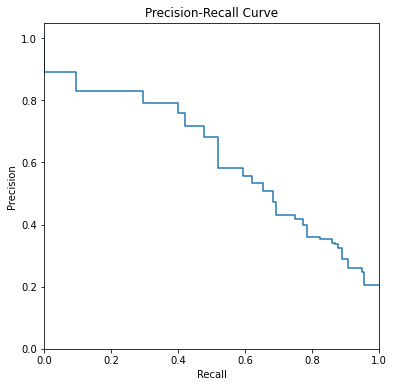

In [78]:
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

Gracias al gráfico de arriba podemos determinar que nuestro modelo funciona de manera correcta. La teoría nos define que entre mas elevada sea la curva mejor es el modelo.
Con esto nuestro modelo entrenado con un árbol de decisiones funcionará correctamente para lo que busca el banco con sus clientes.

## Curva ROC <a id='roc'></a>

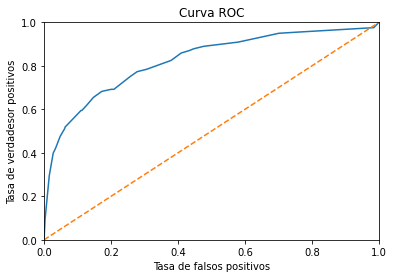

In [79]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdadesor positivos')
plt.title('Curva ROC')
plt.show()

In [80]:
roc_auc_score(target_valid, probabilities_one_valid)

0.8237447723644862

Para aclarar nuevamente si nuestro modelo es correcto, o podemos confiar en el se gráfico una curva ROC, también la teoría nos dice que entre mayor sea la curva presentada mejor calidad tiene el modelo entrenado.

## Prueba Test

Con los dataset features_test y train_test se probará el modelo calculando el valor F1, Threshold y Roc_score

In [81]:
predict_test = best_treemodel_upsamb.predict(features_test)

In [82]:
f1_score(target_test,predict_test)

0.6004228329809724

In [83]:
model = DecisionTreeClassifier()

In [84]:
param_grid = {
    'random_state': [12345],
    'max_depth' : [6,8,14],
    'class_weight' :['balanced',None]
}

In [85]:
CV_tdc = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

In [86]:
CV_tdc.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [6, 8, 14], 'random_state': [12345]})

In [87]:
CV_tdc.best_params_

{'class_weight': None, 'max_depth': 6, 'random_state': 12345}

In [88]:
model_best = DecisionTreeClassifier(class_weight=None, max_depth = 6, random_state = 12345)

In [89]:
model_best.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=6, random_state=12345)

In [90]:
predict_valid = model_best.predict(features_valid)
f1_score(target_valid,predict_valid)

0.503954802259887

In [91]:
predict_test = model_best.predict(features_test)
f1_score(target_test,predict_test)

0.499151103565365

## Conclusión <a id='conclusion'></a>

En este proyecto se busca encontrar un modelo que pueda predecir si un cliente va a dejar de utilizar los servicios de un banco. Se nos proporcionaron datos de 10000 usuarios del banco, entre los que se encuentran usuarios activos y usuarios que dejaron el banco en definitiva.
Para comenzar el proyecto se realizó, un análisis exploratorio, en el que se encontraron valores ausentes en una de las columnas, los cuales se sustituyeron por un valor de 0.

Ya con los datos arreglados, se busco el preprocesamiento de los datos para poderlos ingresar a los modelos. En primer lugar, se utiliza la codificación One-Hot, con lo que usamos las columnas con valores categóricos se clasifican dejando columnas con valores númericos, despúes se uso la escalada estándar para las columnas númericas normalizarlas y el modelo pueda utilizarlas de mejor forma.

Con los datos arreglados, se crean los datasets, feratures, target y test, en features se almacenan todas las columnas de las características que el modelo tomará en cuenta, y en target se almacena la variable objetivo, mientras que en test se almacenan filas de datos para hacer la prueba del modelo final. Estos datasets se dividen a su vez en train y valid.

Tomando los datasets train, se entrena cada modelo (árbol de decisiones, bosque aleatorio y regresión logística) y se cálcula la exactitud del modelo, de inicio se dejan los valores de hiperparámetros por default, solo defininendo random_state. Con esta configuración se obtiene un valor de exactitud; también se calcularon los valores de recall, precisión y F1, para cada modelo obteniendo que el modelo de árbol de decisiones y bosque aleatorio obtuvieron los valores más altos con un F1=1.

Con estos datos de base se mejoraron los modelos buscando la mejor configuración de los hiperparámetros, en este caso se busco modificar max_depth para árbol de decisiones, encontrando que con una produndidad de 19 se obtiene la exactitud mayor. Se recalcula la métrica F1, para verificar si hubo mejoría, encontrando que el valor cambio a 0.98933, lo cual incremento el valor y se determina que el modelo tiene mejor calidad que el anterior.

Se realizó un estudio de balance de clases, con el hiperparámetro class_balance como `balanced`, buscando el mejor valor en max_depth con lo que el valor de F1 incrementó a un 0.9886, lo cual no mejora el modelo, por lo que continuamos con el anterior.

Se buscó si con un sobremuestreo o un submuestreo podríamos mejorar los valores de las métricas, con estos análisis el valor de F1 disminuyé para el sobremuestreo obtenemos un valor de 0.937 y para el submuestreo fue de 0.5435, se omiten estos análisis debido a que no hubo mejora en el modelo.

Se realizó lo antreior para cada uno de los modelos y se encontró que el modelo de bosque aleatorio con clases balanceadas y número de estimaciones de 17 nos da un valor F1 de 1.0

Para finalizar se busca el umbral de clasificación, en el que se calcula el Threshold (límite), y se realiza el gráfico con los valores para revisar la calidad del modelo con las probabilidades de que se obtengan las clases. De igual forma se realiza el cálculo de ROC y se gráfica, con estos dos últimos gráficos podemos observar que nuestro modelo cumple con una buena calidad, y podemos estar seguros que obtendremos predicciones adecuadas a lo que solicita el banco.
